In [28]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import plotnine as p9
import seaborn as sns
from IPython.display import display,HTML

In [29]:
#Leo mi archivo.csv
Covid = pd.read_csv("COVID19MEXICO.csv")
#Filtro por filas
Covid= Covid.iloc[0:100000,: ]
Covid

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_9157/3200633899.py:2: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.


,Unnamed: 0,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,0,27/08/2022,1a4a8d,1,12.0,23.0,2.0,27,23,8.0,...,2.0,2,97,1,2.0,7,99,México,97,97
1,1,27/08/2022,01e27d,2,9.0,25.0,2.0,25,25,1.0,...,2.0,2,97,1,2.0,7,99,México,97,97
2,2,27/08/2022,13cf10,2,9.0,9.0,1.0,9,9,14.0,...,2.0,1,1,2,97.0,3,99,México,97,97
3,3,27/08/2022,13c92b,2,12.0,9.0,1.0,9,9,2.0,...,1.0,2,97,1,2.0,7,99,México,97,97
4,4,27/08/2022,04af5f,2,12.0,9.0,1.0,9,9,7.0,...,1.0,2,97,1,2.0,7,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,27/08/2022,47548a,2,12.0,9.0,1.0,11,15,31.0,...,2.0,1,2,1,2.0,7,99,México,97,97
99996,99996,27/08/2022,5c2773,2,NaN,9.0,2.0,15,15,95.0,...,1.0,2,97,1,2.0,7,99,México,97,97
99997,99997,27/08/2022,aceb1f,2,4.0,NaN,2.0,28,28,22.0,...,1.0,2,97,1,1.0,3,99,México,97,97
99998,99998,27/08/2022,db2a23,2,4.0,9.0,1.0,15,9,6.0,...,1.0,2,97,1,1.0,3,99,México,97,97


In [30]:
#Se identifican las variables que contienen valores nulos
valores_nulos=Covid.isnull().sum()
valores_nulos

Unnamed: 0               0
FECHA_ACTUALIZACION      0
ID_REGISTRO              0
ORIGEN                   0
SECTOR                   1
ENTIDAD_UM               1
SEXO                     1
ENTIDAD_NAC              0
ENTIDAD_RES              0
MUNICIPIO_RES            1
TIPO_PACIENTE            0
FECHA_INGRESO            0
FECHA_SINTOMAS           0
FECHA_DEF                0
INTUBADO                 0
NEUMONIA                 0
EDAD                     3
NACIONALIDAD             0
EMBARAZO                 2
HABLA_LENGUA_INDIG       0
INDIGENA                 0
DIABETES                 0
EPOC                     0
ASMA                     0
INMUSUPR                 0
HIPERTENSION             1
OTRA_COM                 0
CARDIOVASCULAR           0
OBESIDAD                 0
RENAL_CRONICA            0
TABAQUISMO               1
OTRO_CASO                1
TOMA_MUESTRA_LAB         0
RESULTADO_LAB            0
TOMA_MUESTRA_ANTIGENO    0
RESULTADO_ANTIGENO       1
CLASIFICACION_FINAL      0
M

In [107]:
***************************Valores Nulos**********************************

SyntaxError: invalid syntax (3158766728.py, line 1)

In [31]:
#Copia del Dataframe
Covid2=Covid.copy()

In [32]:
#Valores Nulos en nuestro dataframe a los que se les dará tratamiento
#SECTOR                   1
#ENTIDAD_UM               1
#SEXO                     1
#MUNICIPIO_RES            1
#EDAD                     3
#EMBARAZO                 2
#HIPERTENSION             1
#TABAQUISMO               1
#OTRO_CASO                1
#RESULTADO_ANTIGENO       1
#PAIS_NACIONALIDAD        2

In [33]:
#Debido al tipo de datos con los que contamos en nuestro dataframe, unicamente de aplicará la
#sustitución de valores nulos con promedio a la variable "EDAD"
#Las de mas variables se les aplicará la sustitución "forward fill" ("ffill") y backward fill" ("bfill")

#Sustituir valores nulos con promedio o media
#EDAD

Covid2["EDAD"]=Covid2["EDAD"].fillna(round(Covid["EDAD"].mean(),1))

In [34]:
 #Sustituir valores nulos por valores no nulos hacia adelante  "forward fill" ("ffill")
#HIPERTENSION             
#TABAQUISMO               
#OTRO_CASO    
#SEXO   
#MUNICIPIO_RES    

Covid2["HIPERTENSION"] =Covid2["HIPERTENSION"].fillna(method="ffill") 
Covid2["TABAQUISMO"] =Covid2["TABAQUISMO"].fillna(method="ffill") 
Covid2["OTRO_CASO"] =Covid2["OTRO_CASO"].fillna(method="ffill") 
Covid2["SEXO"] =Covid2["SEXO"].fillna(method="ffill") 
Covid2["MUNICIPIO_RES"] =Covid2["MUNICIPIO_RES"].fillna(method="ffill") 


In [35]:
#Sustituir valores nulos por valores no nulos hacia atrás backward fill" ("bfill")
#RESULTADO_ANTIGENO       
#PAIS_NACIONALIDAD  
#ENTIDAD_UM
#SECTOR                   
#EMBARAZO   

Covid2["RESULTADO_ANTIGENO"] =Covid2["RESULTADO_ANTIGENO"].fillna(method="bfill") 
Covid2["PAIS_NACIONALIDAD"] =Covid2["PAIS_NACIONALIDAD"].fillna(method="bfill") 
Covid2["ENTIDAD_UM"] =Covid2["ENTIDAD_UM"].fillna(method="bfill") 
Covid2["SECTOR"] =Covid2["SECTOR"].fillna(method="bfill") 
Covid2["EMBARAZO"] =Covid2["EMBARAZO"].fillna(method="bfill") 

In [36]:
#Corroboramos valores nulos
valores_nulos=Covid2.isnull().sum().sum()
valores_nulos

0

In [37]:
valores_nulos=Covid2.isnull().sum()
valores_nulos

Unnamed: 0               0
FECHA_ACTUALIZACION      0
ID_REGISTRO              0
ORIGEN                   0
SECTOR                   0
ENTIDAD_UM               0
SEXO                     0
ENTIDAD_NAC              0
ENTIDAD_RES              0
MUNICIPIO_RES            0
TIPO_PACIENTE            0
FECHA_INGRESO            0
FECHA_SINTOMAS           0
FECHA_DEF                0
INTUBADO                 0
NEUMONIA                 0
EDAD                     0
NACIONALIDAD             0
EMBARAZO                 0
HABLA_LENGUA_INDIG       0
INDIGENA                 0
DIABETES                 0
EPOC                     0
ASMA                     0
INMUSUPR                 0
HIPERTENSION             0
OTRA_COM                 0
CARDIOVASCULAR           0
OBESIDAD                 0
RENAL_CRONICA            0
TABAQUISMO               0
OTRO_CASO                0
TOMA_MUESTRA_LAB         0
RESULTADO_LAB            0
TOMA_MUESTRA_ANTIGENO    0
RESULTADO_ANTIGENO       0
CLASIFICACION_FINAL      0
M

In [38]:
Covid2.dtypes

Unnamed: 0                 int64
FECHA_ACTUALIZACION       object
ID_REGISTRO               object
ORIGEN                     int64
SECTOR                   float64
ENTIDAD_UM               float64
SEXO                     float64
ENTIDAD_NAC                int64
ENTIDAD_RES                int64
MUNICIPIO_RES            float64
TIPO_PACIENTE              int64
FECHA_INGRESO             object
FECHA_SINTOMAS            object
FECHA_DEF                 object
INTUBADO                   int64
NEUMONIA                   int64
EDAD                     float64
NACIONALIDAD               int64
EMBARAZO                 float64
HABLA_LENGUA_INDIG         int64
INDIGENA                   int64
DIABETES                   int64
EPOC                       int64
ASMA                       int64
INMUSUPR                   int64
HIPERTENSION             float64
OTRA_COM                   int64
CARDIOVASCULAR             int64
OBESIDAD                   int64
RENAL_CRONICA              int64
TABAQUISMO

In [39]:
#Creamos un nuevo dataframe y nos quedamos solo con los valores númericos
Covid3= Covid2.drop(['Unnamed: 0','FECHA_ACTUALIZACION','ID_REGISTRO','FECHA_INGRESO','FECHA_SINTOMAS','FECHA_DEF','PAIS_NACIONALIDAD','PAIS_ORIGEN'],axis=1)

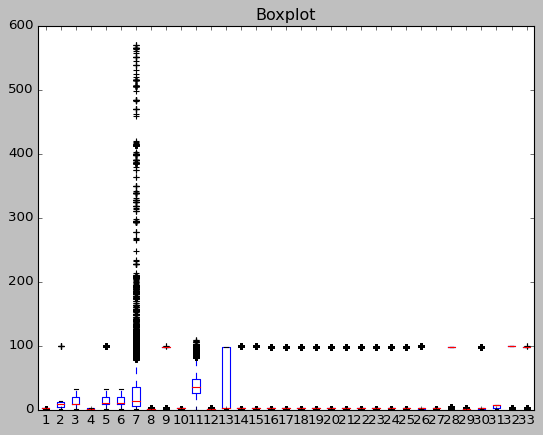

In [40]:
#Analizamos si existen Outliers en nuestras variables numericas
plt.boxplot(Covid3)
plt.title("Boxplot")
plt.show()

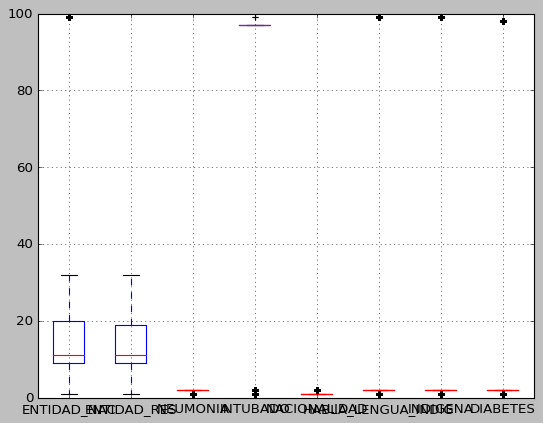

In [53]:
#Visualizamos los datos por bloques para analizarlos mejor la información y detectar outliers
boxplot = Covid3.boxplot(column=['EPOC','ASMA','INMUSUPR','OTRA_COM','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA','TOMA_MUESTRA_LAB')

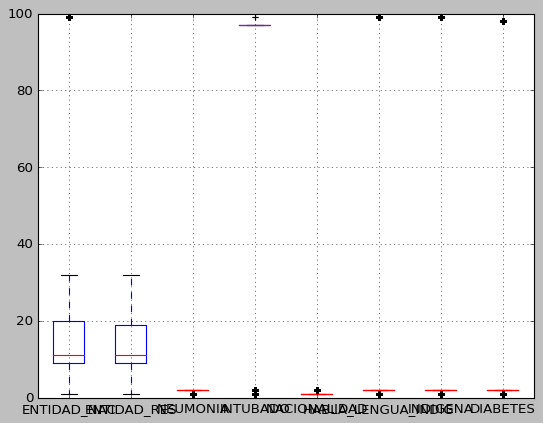

In [54]:
boxplot = Covid3.boxplot(column=['ENTIDAD_NAC','ENTIDAD_RES','NEUMONIA','INTUBADO','NACIONALIDAD','HABLA_LENGUA_INDIG','INDIGENA','DIABETES'])

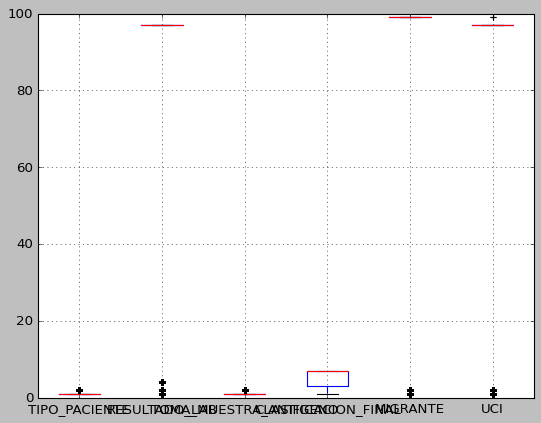

In [55]:
boxplot = Covid3.boxplot(column=['TIPO_PACIENTE','RESULTADO_LAB','TOMA_MUESTRA_ANTIGENO','CLASIFICACION_FINAL','MIGRANTE','UCI'])

In [98]:
#Se puede ver como la gran mayoria de las variables contienen solo 2 tipos de respuestas númericas
#Por lo que aunque los datos se encuentren alejados de la media, siguen siendo correctos.

#La unica variable que presentaba inconsistencias era "ENTIDAD_NAC"
#Por lo que se usó el MÉTODO DE DESVIACIÓN ESTÁNDAR para sustituir esos valores

y=Covid2["ENTIDAD_NAC"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)
outliers= Covid2[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

Limite superior permitido 45.444945460180215
Limite inferior permitido -15.711165460180217


,Unnamed: 0,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
250,250,27/08/2022,3a2068,1,12.0,3.0,2.0,99,3,2.0,...,2.0,2,97,2,97.0,6,1,Estados Unidos de América,Estados Unidos de América,97
422,422,27/08/2022,b1d392,2,12.0,2.0,2.0,99,2,1.0,...,2.0,2,97,2,97.0,1,1,Cuba,Cuba,97
536,536,27/08/2022,ba039b,2,12.0,9.0,1.0,99,9,15.0,...,2.0,2,97,1,2.0,7,2,Venezuela,97,97
540,540,27/08/2022,854184,2,12.0,9.0,1.0,99,9,3.0,...,1.0,2,97,1,2.0,7,2,Venezuela,97,97
624,624,27/08/2022,b94888,2,12.0,9.0,1.0,99,9,16.0,...,1.0,2,97,1,2.0,7,1,Venezuela,Venezuela,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99400,99400,27/08/2022,85a768,2,12.0,9.0,1.0,99,9,10.0,...,2.0,2,97,1,1.0,3,2,Venezuela,97,97
99456,99456,27/08/2022,ce6ce8,2,12.0,9.0,1.0,99,9,10.0,...,2.0,2,97,1,2.0,7,2,Venezuela,97,97
99650,99650,27/08/2022,b1bf03,2,12.0,26.0,1.0,99,26,19.0,...,99.0,2,97,1,1.0,3,2,Estados Unidos de América,97,97
99664,99664,27/08/2022,cf5a88,1,12.0,9.0,2.0,99,9,12.0,...,2.0,1,2,2,97.0,7,2,Ecuador,97,97


In [99]:
Covid3_Clean= Covid2[(y<=Limite_Superior)&(y>=Limite_Inferior)]
Covid3_Clean

,Unnamed: 0,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,0,27/08/2022,1a4a8d,1,12.0,23.0,2.0,27,23,8.0,...,2.0,2,97,1,2.0,7,99,México,97,97
1,1,27/08/2022,01e27d,2,9.0,25.0,2.0,25,25,1.0,...,2.0,2,97,1,2.0,7,99,México,97,97
2,2,27/08/2022,13cf10,2,9.0,9.0,1.0,9,9,14.0,...,2.0,1,1,2,97.0,3,99,México,97,97
3,3,27/08/2022,13c92b,2,12.0,9.0,1.0,9,9,2.0,...,1.0,2,97,1,2.0,7,99,México,97,97
4,4,27/08/2022,04af5f,2,12.0,9.0,1.0,9,9,7.0,...,1.0,2,97,1,2.0,7,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,27/08/2022,47548a,2,12.0,9.0,1.0,11,15,31.0,...,2.0,1,2,1,2.0,7,99,México,97,97
99996,99996,27/08/2022,5c2773,2,4.0,9.0,2.0,15,15,95.0,...,1.0,2,97,1,2.0,7,99,México,97,97
99997,99997,27/08/2022,aceb1f,2,4.0,9.0,2.0,28,28,22.0,...,1.0,2,97,1,1.0,3,99,México,97,97
99998,99998,27/08/2022,db2a23,2,4.0,9.0,1.0,15,9,6.0,...,1.0,2,97,1,1.0,3,99,México,97,97
